/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Keras Spam Accuracy: 1.0
Keras Spam Loss: 0.6492452621459961


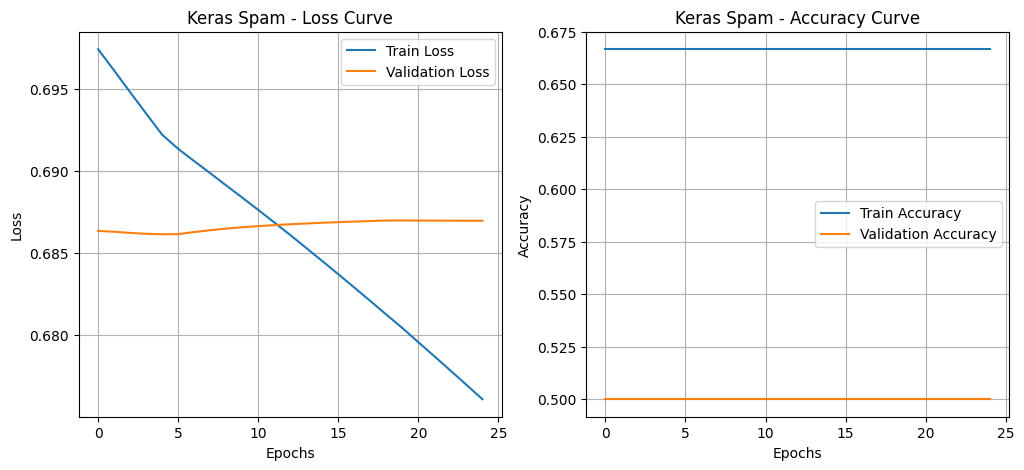

In [1]:
# ----------------------------------------------------------
# KERAS – Spam Classification with Accuracy + Loss + Graphs
# ----------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Custom SMS dataset
messages = [
    "Congratulations! You won a $1000 gift card.",
    "You have been selected for a lucky draw cash prize!",
    "Win money now! Claim your reward.",
    "Free entry in a weekly contest! Click here!",
    "Your OTP is 667890. Do not share with anyone.",
    "Hey, are we still meeting today?",
    "Please submit the assignment by 5 PM.",
    "Call me when you reach home.",
    "Your recharge is successful.",
    "Limited offer!!! Buy 1 get 1 free today only!",
]

labels = [1,1,1,1,0,0,0,0,0,1]

# TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(messages).toarray()
y = np.array(labels)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=25, verbose=0, validation_split=0.2)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Keras Spam Accuracy:", accuracy)
print("Keras Spam Loss:", loss)

# Graphs
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Keras Spam - Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train Loss", "Validation Loss"])
plt.grid(True)

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Keras Spam - Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train Accuracy", "Validation Accuracy"])
plt.grid(True)

plt.show()
